<a href="https://colab.research.google.com/github/Ahmad10Raza/Waste-Classifier-WebApp/blob/master/Garbage_and_Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Garbage and Waste Classifier Using DL**


## **Problem Statement:**

The "Garbage and Waste Classifier Using Deep Learning" project aims to address the pressing issue of improper waste management and recycling by developing an accurate and efficient deep learning system that can classify various types of waste and garbage items.

## **Problem Description:**

Improper disposal and mismanagement of waste and garbage have detrimental effects on the environment, public health, and sustainability. Inadequate waste sorting and recycling practices contribute to pollution, landfill overflow, and resource depletion. To mitigate these problems, there is a critical need for a highly accurate and automated system that can identify and classify different types of waste and garbage items.

The objective of this project is to create a robust deep learning-based classification system that can accurately categorize waste and garbage items into various classes such as plastics, glass, paper, organic waste, metals, and more. The system will be capable of distinguishing between recyclable and non-recyclable materials, as well as identifying hazardous waste items that require special disposal methods.

**Key Challenges:**

1. **Variability in Waste Types:** Garbage and waste items come in a wide range of shapes, sizes, colors, and materials. Developing a classifier that can handle this variability is a significant challenge.

2. **Data Collection and Labeling:** Gathering a diverse and extensive dataset of waste items with accurate labels is crucial for training the deep learning model.

3. **Real-time Classification:** The system should be capable of classifying waste items in real-time or with minimal latency to be practical for use in waste sorting facilities or mobile applications.

4. **Environmental Conditions:** The system should be robust to environmental conditions such as varying lighting, humidity, and occlusions that are typically encountered in waste sorting facilities.

5. **Cost-Effective Hardware:** Designing an affordable hardware setup, possibly utilizing cameras and sensors, to capture waste item images is vital for practical implementation.

**Significance:**

The successful development of a "Garbage and Waste Classifier Using Deep Learning" system has the potential to significantly improve waste management practices. It can enhance the efficiency of waste sorting and recycling facilities, promote environmentally responsible behaviors, and contribute to a cleaner and more sustainable environment.

This project will not only have immediate practical applications in waste management but also raise awareness about the importance of proper waste disposal and recycling, ultimately leading to a more sustainable and eco-friendly society.


# Importing Libraries

In [1]:
! pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
import keras
#from tf.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image as im
import cv2
import tensorflow as tf

**The code below provided is a function called seed_everything(), which sets the seeds for the random number generators in Python, NumPy, TensorFlow, and the operating system. This is done to make the experiment more reproducible, meaning that if you run the code again with the same seed, we will get the same results**

In [3]:
# Set seeds to make the experiment more reproducible.
import random

def seed_everything(seed = 0):
    """Sets the seeds for the random number generators in Python, NumPy, TensorFlow, and the operating system.

    Args:
        seed: The seed to use.
    """

    # Set the Python random seed.
    random.seed(seed)

    # Set the NumPy random seed.
    np.random.seed(seed)

    # Set the TensorFlow random seed.
    tf.random.set_seed(seed)

    # Set the operating system random seed.
    os.environ['PYTHONHASHSEED'] = str(seed)

# Set the seed to 0.
seed = 0

# Call the seed_everything() function with the seed.
seed_everything(seed)


# Loading Datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

data_path="/content/drive/MyDrive/Colab Notebooks/DS_PROJECT/Waste-Classifier-WebApp/Data/image"
os.listdir(data_path)

['train', 'test']

In [6]:
input_path=data_path
train_data_dir=input_path + '/' + 'train'
test_data_dir=input_path + '/' + 'test'

In [7]:
BATCH_SIZE=64
img_height=244
img_width=244

#### preparing for training datasets

In [8]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_data_dir,validation_split=0.2,
    subset='training',label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=BATCH_SIZE,
    seed=123
)

Found 2187 files belonging to 7 classes.
Using 1750 files for training.


In [9]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE,
    seed = 123
  )

Found 2187 files belonging to 7 classes.
Using 437 files for validation.


In [10]:
class_names=train_ds.class_names
print(class_names)

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']


# Data Visualization

In [11]:
plt.style.use('dark_background')

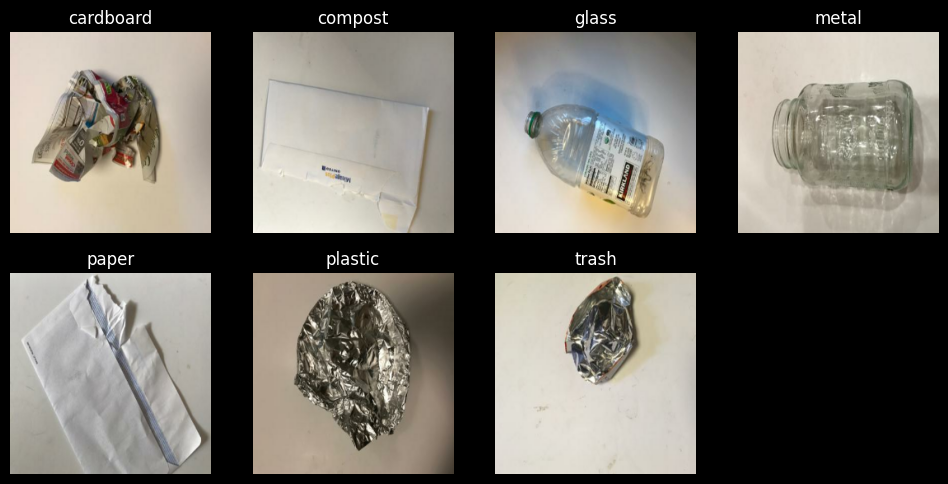

In [12]:
plt.figure(figsize=(12,12))
for img,label in train_ds.take(1):
  for i in range(len(class_names)):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(class_names[i])
    plt.axis('off')

**The code below provided is a sequence of Keras layers that can be used for image data augmentation. Data augmentation is a technique that can be used to increase the size and diversity of a training dataset by creating new images from existing images. This can help to improve the performance of machine learning models, especially when the training dataset is small.**

In [13]:
data_augmentation = keras.Sequential([
    #layers.CenterCrop(125, 125),
    tf.keras.layers.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
    tf.keras.layers.RandomRotation(0.2, fill_mode = 'nearest'),
    tf.keras.layers.RandomZoom(0.1),
])

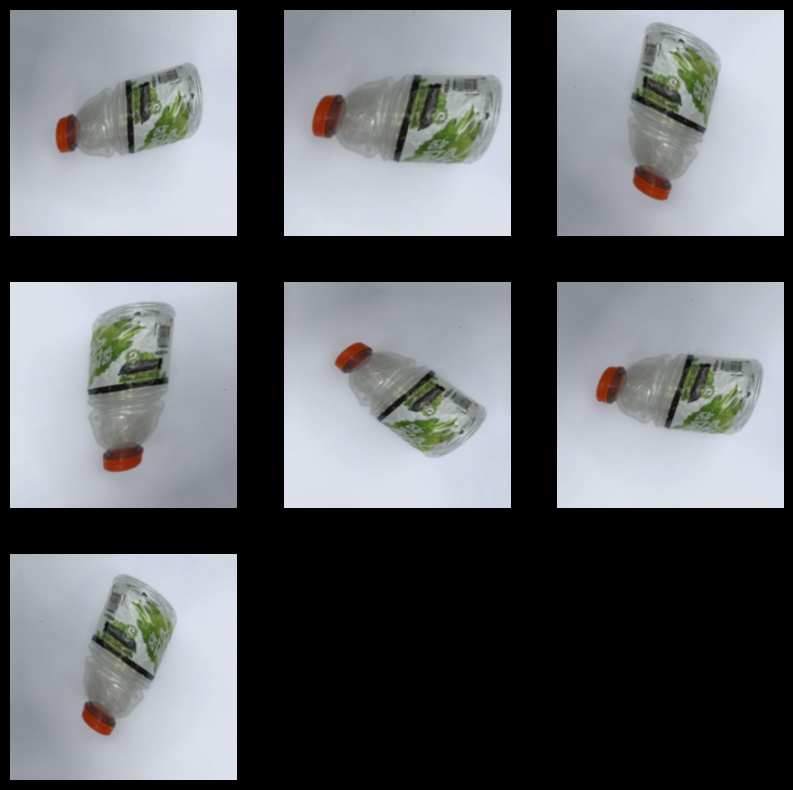

In [14]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
   # plt.title(class_names[2])
    plt.axis("off")

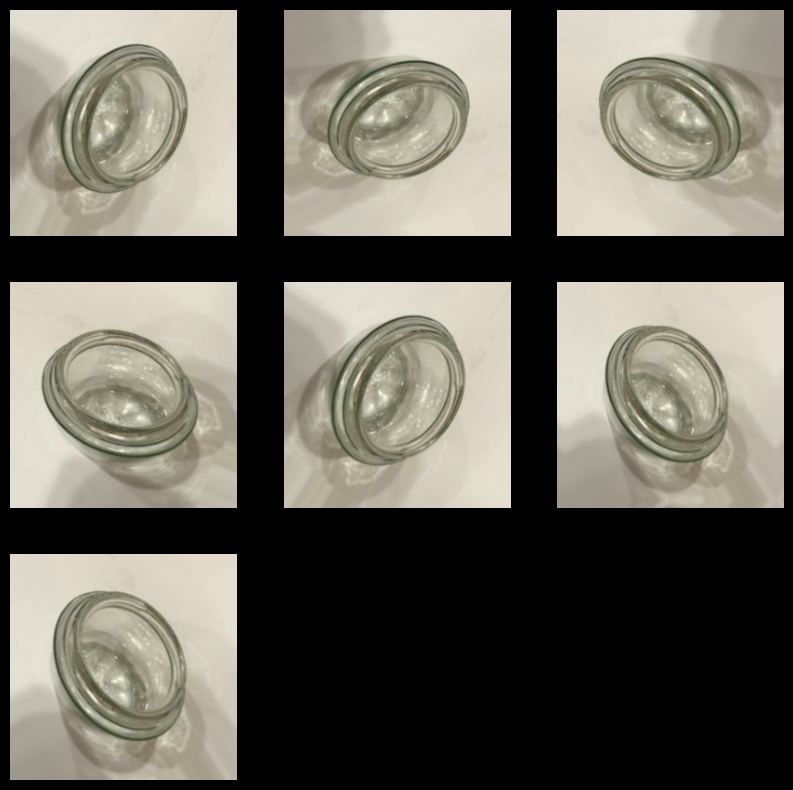

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
   # plt.title(class_names[2])
    plt.axis("off")

**The code below provided is used to prefetch the training and validation datasets. Prefetching is a technique that can be used to improve the performance of machine learning models by loading data into memory in advance. This can help to reduce the time it takes to train the model, especially when the dataset is large.**

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Model Architecture

## VGG-16 Base Model

VGG-16, short for "Visual Geometry Group 16-layer," is a convolutional neural network (CNN) architecture designed for image classification. It was developed by the Visual Geometry Group at the University of Oxford and is known for its simplicity and effectiveness. VGG-16 is part of the VGG family of models, which includes various configurations with different numbers of layers, but VGG-16 specifically consists of 16 weight layers, including 13 convolutional layers and 3 fully connected layers.

Key characteristics of the VGG-16 architecture:

1. **Architecture:** VGG-16 comprises a stack of convolutional layers, followed by max-pooling layers, and concludes with fully connected layers. The network architecture is relatively deep, and it uses 3x3 convolutional filters with a stride of 1 and 2x2 max-pooling with a stride of 2.

2. **Uniform Convolutional Layers:** One notable feature of VGG-16 is its uniform use of 3x3 convolutional filters. The repeated use of these small filters allows the network to learn a wide range of image features at different scales.

3. **Depth:** VGG-16 is considered deep for its time (2014), with 13 convolutional layers. The depth of the network aids in capturing complex hierarchical features.

4. **Fully Connected Layers:** The convolutional layers are followed by three fully connected layers, with the last fully connected layer producing the final classification output.

5. **ReLU Activation Function:** Rectified Linear Units (ReLU) are used as activation functions throughout the network, promoting faster convergence during training.

VGG-16 was trained on the ImageNet dataset, a large dataset with millions of labeled images from thousands of categories. As a result, it achieved state-of-the-art performance on various image classification tasks at the time of its introduction.

While VGG-16 is a powerful architecture for image classification, it has a relatively high number of parameters, making it computationally expensive to train and deploy. More recent CNN architectures, like those in the ResNet and Inception families, have addressed some of the limitations of VGG by introducing skip connections and more efficient architectures. However, VGG-16 remains a valuable reference point and is often used as a base model for transfer learning in computer vision tasks. Researchers and practitioners may take the pre-trained VGG-16 model and fine-tune it on their specific image classification tasks to leverage its learned features.

In [17]:
# from PIL import Image
# from IPython.display import display
# img1=Image.open("Data/VGG_16_Architecture.png")
# img1=img1.convert('RGB')
# display(img1)

## Architecture and Working..
The VGG-16 architecture is a widely recognized convolutional neural network (CNN) designed for image classification. It was introduced by the Visual Geometry Group (VGG) at the University of Oxford and is known for its simplicity and effectiveness. Here's an overview of its architecture and how it works:

**Architecture:**
The VGG-16 architecture consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. It is characterized by its uniform use of small 3x3 convolutional filters and 2x2 max-pooling layers. The network progressively reduces spatial dimensions and increases the depth as you move through the layers. Below is a breakdown of the architecture:

1. **Input Layer:** VGG-16 takes an RGB image as input with a fixed size, typically 224x224 pixels.

2. **Convolutional Layers:** The initial layers consist of two or more stacked 3x3 convolutional layers, followed by a 2x2 max-pooling layer to reduce the spatial dimensions. These layers are designed to capture low-level features such as edges and simple textures.

3. **Intermediate Convolutional Layers:** VGG-16 repeats this pattern of 3x3 convolutional layers and max-pooling layers multiple times, increasing the depth and allowing the network to learn more complex and abstract features.

4. **Fully Connected Layers:** After the convolutional layers, there are three fully connected layers. These layers perform high-level feature extraction and produce the final classification output. The last fully connected layer typically has as many neurons as there are classes in the classification task, and it is activated using the softmax function to produce class probabilities.

5. **Softmax Layer:** The final layer of the network is a softmax layer that assigns class probabilities to the input image based on the output of the previous fully connected layer.

**Working:**
The VGG-16 network works by passing the input image through the layers sequentially, extracting and transforming features at each layer. Here's how it operates:

1. **Forward Propagation:** When an image is fed into the VGG-16 network, it undergoes a series of convolution operations, followed by activation functions (typically ReLU), and max-pooling operations. This process continues through the convolutional layers, gradually reducing the spatial dimensions while increasing the depth.

2. **Feature Extraction:** The convolutional layers learn to recognize various features, starting with simple shapes and edges in the early layers and progressing to more complex patterns and textures in the deeper layers.

3. **Flattening:** After the convolutional layers, the feature maps are flattened into a 1D vector, which is then passed through the fully connected layers.

4. **Classification:** The fully connected layers perform high-level feature extraction and classification. The output of the last fully connected layer is used to produce class probabilities through the softmax activation function.

5. **Prediction:** The class with the highest probability in the softmax output is considered the predicted class for the input image.

Training a VGG-16 model typically involves using a large labeled dataset, such as ImageNet, and backpropagation to adjust the model's weights and biases to minimize the classification error. Once trained, the model can be used for image classification tasks. Additionally, it's often employed as a base model for transfer learning, where the pre-trained VGG-16 model is fine-tuned on a specific dataset for a particular image classification task, leveraging the learned features from the earlier layers.

In [18]:
IMG_SHAPE=(img_height,img_width,3)

base_model=tf.keras.applications.VGG16(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                              

In [19]:
def print_layer_trainable():
  for l in base_model.layers:
    print("{0}:\t==>\t{1}".format(l.trainable,l.name))

In [20]:
print_layer_trainable()

True:	==>	input_1
True:	==>	block1_conv1
True:	==>	block1_conv2
True:	==>	block1_pool
True:	==>	block2_conv1
True:	==>	block2_conv2
True:	==>	block2_pool
True:	==>	block3_conv1
True:	==>	block3_conv2
True:	==>	block3_conv3
True:	==>	block3_pool
True:	==>	block4_conv1
True:	==>	block4_conv2
True:	==>	block4_conv3
True:	==>	block4_pool
True:	==>	block5_conv1
True:	==>	block5_conv2
True:	==>	block5_conv3
True:	==>	block5_pool


###  Fix the weights

In [21]:
base_model.trainable=False

In [22]:
for layer in base_model.layers:
  layer.trainable=False

In [23]:
print_layer_trainable()

False:	==>	input_1
False:	==>	block1_conv1
False:	==>	block1_conv2
False:	==>	block1_pool
False:	==>	block2_conv1
False:	==>	block2_conv2
False:	==>	block2_pool
False:	==>	block3_conv1
False:	==>	block3_conv2
False:	==>	block3_conv3
False:	==>	block3_pool
False:	==>	block4_conv1
False:	==>	block4_conv2
False:	==>	block4_conv3
False:	==>	block4_pool
False:	==>	block5_conv1
False:	==>	block5_conv2
False:	==>	block5_conv3
False:	==>	block5_pool


In [24]:
# Number of classes in the dataset
n_classes = len(class_names)

# Define the sequential model
model = Sequential([

    # Apply random transformations to the input images
    data_augmentation,

    # Normalize the input images to the range [0, 1]
    tf.keras.layers.Rescaling(1./255),

    # Use a pre-trained model as a starting point
    base_model,

    # Convert the input images to a single vector of features
    tf.keras.layers.GlobalAveragePooling2D(),

    # Learn a non-linear transformation of the input features
    tf.keras.layers.Dense(128, activation = 'relu'),

    # Prevent overfitting by randomly dropping out some of the units during training
    tf.keras.layers.Dropout(0.5),

    # Classify the input images into one of n_classes classes
    tf.keras.layers.Dense(n_classes, activation = 'softmax')
])


This code snippet defines a Keras model for image classification. The model is defined using the Sequential API, which allows us to stack layers in a sequential order.

The first layer in the model is the data_augmentation layer. This layer applies random transformations to the input images, such as cropping, flipping, and rotating. This helps to improve the model's generalization performance.

The next layer is the Rescaling layer. This layer normalizes the input images to the range [0, 1]. This is a common practice in image classification, as it helps to improve the performance of many models.

The next layer is the base_model. This is a pre-trained model that has been trained on a large dataset of images. We can use a pre-trained model as a starting point for our own model, which can save us a lot of time and effort.

The next layer is the GlobalAveragePooling2D layer. This layer converts the input images to a single vector of features. This is a common practice in image classification, as it allows us to use a fully connected layer to classify the images.

The next layer is a Dense layer with 128 units and the relu activation function. This layer learns a non-linear transformation of the input features.

The next layer is a Dropout layer with a dropout rate of 0.5. This layer helps to prevent overfitting by randomly dropping out some of the units during training.

The last layer in the model is a Dense layer with n_classes units and the softmax activation function. This layer classifies the input images into one of n_classes classes.

# Transfer Learning:

Transfer learning is a machine learning technique where a model trained on one task is adapted for use on a second related task. It leverages the knowledge gained from the source task to improve learning and performance on the target task. Transfer learning is widely used in various fields, including computer vision, natural language processing, and speech recognition, to save time and resources while achieving better results.

Here's how transfer learning typically works:

1. **Pre-training**: A neural network model, often a deep learning model like a convolutional neural network (CNN) for image tasks or a recurrent neural network (RNN) for text tasks, is trained on a large dataset for a related task. This initial training, known as pre-training, helps the model learn useful features and representations of the data.

2. **Fine-tuning**: After pre-training, the model is fine-tuned on the target task. The earlier layers of the model, which have learned general features, are often kept fixed, while the later layers are adjusted or retrained for the specific target task. This allows the model to adapt its knowledge to the new task, making the training process faster and more effective.

Transfer learning offers several advantages:

1. **Reduced Data Requirements**: Since the model has already learned valuable features from the source task, it may require less data for training on the target task.

2. **Faster Training**: Transfer learning typically accelerates the training process, as the model starts with a foundation of knowledge.

3. **Improved Generalization**: Models trained with transfer learning often generalize better to new tasks and domains because they capture more general patterns.

4. **Resource Efficiency**: It saves computational resources and time compared to training a model from scratch.

Transfer learning is used in various applications, such as image classification, object detection, sentiment analysis, machine translation, and more. Popular pre-trained models like BERT for natural language processing and ResNet for computer vision have demonstrated the effectiveness of this technique in different domains.

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 244, 244, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

**Why do we need to compile the model?**

We need to compile the model before we can train or evaluate it. The compiler configures the learning process and ensures that all of the necessary components are in place.

In [26]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
from keras.callbacks import ReduceLROnPlateau

# Model Chackpoint
tl_checkpoint_1 = ModelCheckpoint(filepath = 'vgg16_best_weights.hdf5', save_best_only = True, verbose = 0)

# EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, mode = 'min')

# ReduceLROnPlateau to stabilize the training process of the model
rop_callback = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.000001)


**Model Chackpoint**

The ModelCheckpoint callback saves the model's weights to a file at the end of each epoch. If the model is performing better at the end of an epoch than it was at the end of the previous epoch, the weights are overwritten. This ensures that we always have the best performing model weights saved.

**EarlyStopping**

The EarlyStopping callback stops training the model if the monitored metric does not improve for a specified number of epochs. This helps to prevent overfitting and save training time.

**ReduceLROnPlateau**

The ReduceLROnPlateau callback reduces the learning rate of the optimizer if the monitored metric does not improve for a specified number of epochs. This can help to improve the model's performance and prevent overfitting.


In [28]:
%%time

history=model.fit(train_ds,epochs=51,validation_data=validation_ds,callbacks=[tl_checkpoint_1,early_stop,rop_callback])

Epoch 1/51
28/28 [==============================] - ETA: 0s - loss: 1.9179 - accuracy: 0.2223

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 575s 6s/step - loss: 1.9179 - accuracy: 0.2223 - val_loss: 1.6663 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 2/51
28/28 [==============================] - 11s 382ms/step - loss: 1.6292 - accuracy: 0.3663 - val_loss: 1.4900 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 3/51
28/28 [==============================] - 11s 393ms/step - loss: 1.5052 - accuracy: 0.4257 - val_loss: 1.4020 - val_accuracy: 0.4943 - lr: 0.0010
Epoch 4/51
28/28 [==============================] - 11s 413ms/step - loss: 1.3992 - accuracy: 0.4509 - val_loss: 1.2944 - val_accuracy: 0.5561 - lr: 0.0010
Epoch 5/51
28/28 [==============================] - 11s 412ms/step - loss: 1.3341 - accuracy: 0.5074 - val_loss: 1.2339 - val_accuracy: 0.5744 - lr: 0.0010
Epoch 6/51
28/28 [==============================] - 11s 386ms/step - loss: 1.2753 - accuracy: 0.5109 - val_loss: 1.1801 - val_accuracy: 0.5973 - lr: 0.0010
Epoch 7/51
28/28 [==============================] - 11s 385ms/step - loss: 1.

In [29]:
acc = history.history['accuracy']
acc

[0.22228571772575378,
 0.3662857115268707,
 0.42571428418159485,
 0.45085713267326355,
 0.5074285864830017,
 0.5108571648597717,
 0.5514285564422607,
 0.5531428456306458,
 0.5537142753601074,
 0.5868571400642395,
 0.5914285778999329,
 0.5965714454650879,
 0.6137142777442932,
 0.6188571453094482,
 0.6285714507102966,
 0.6331428289413452,
 0.6428571343421936,
 0.6439999938011169,
 0.6417142748832703,
 0.6468571424484253,
 0.6679999828338623,
 0.6645714044570923,
 0.6674285531044006,
 0.6828571557998657,
 0.673714280128479,
 0.6782857179641724,
 0.6834285855293274,
 0.6880000233650208,
 0.6857143044471741,
 0.694857120513916,
 0.7051428556442261,
 0.6959999799728394,
 0.7085714340209961,
 0.694857120513916,
 0.7022857069969177,
 0.7228571176528931,
 0.7171428799629211,
 0.7034285664558411,
 0.7182857394218445,
 0.7160000205039978,
 0.701714277267456,
 0.7142857313156128,
 0.7125714421272278,
 0.7337142825126648,
 0.7200000286102295,
 0.7120000123977661,
 0.7342857122421265,
 0.73428571224

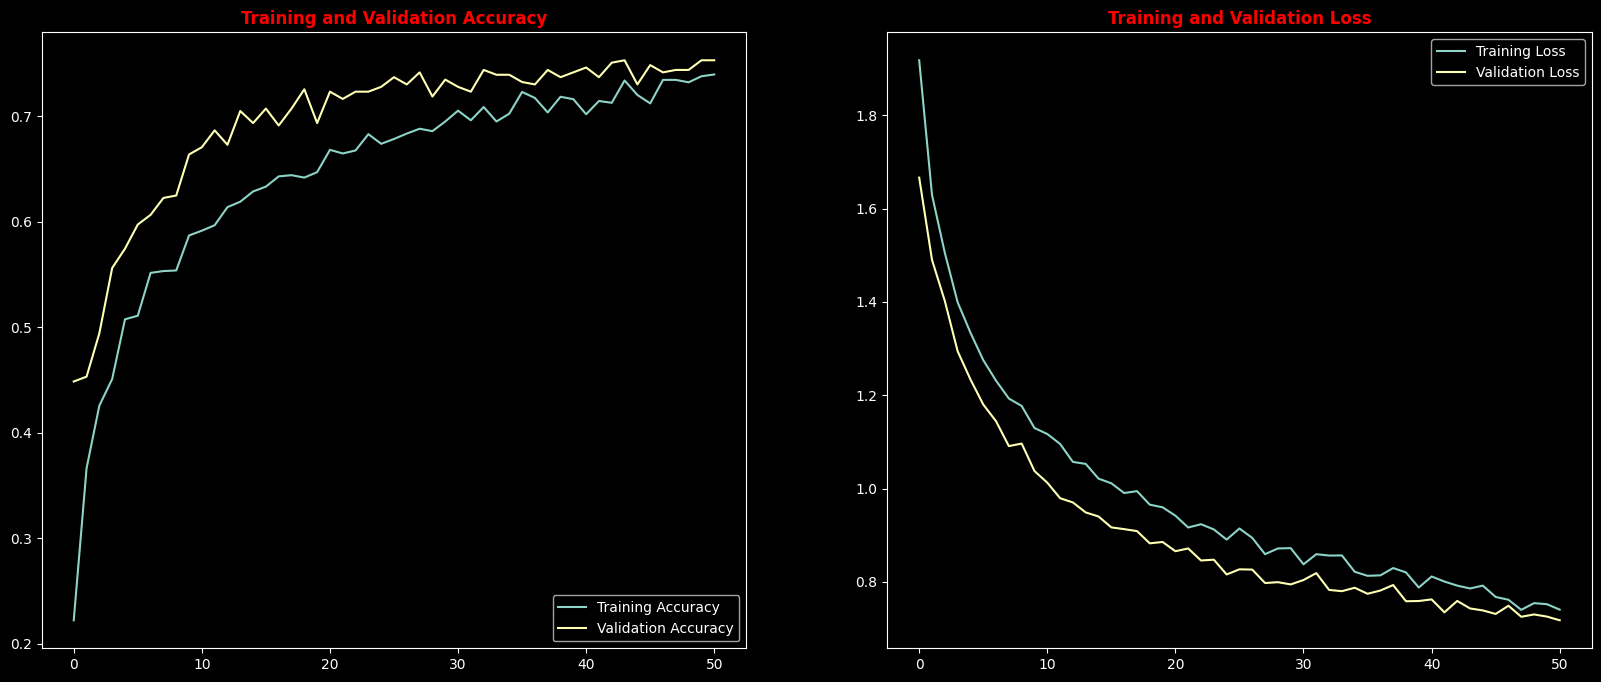

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(51)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy',weight='bold',color='red')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss',weight='bold',color='red')
plt.show()

## Tips For Reading above Graph...

Reading and interpreting training and validation accuracy, as well as training and validation loss, graphs is a common practice in machine learning to assess the performance of a model during training. These graphs help you understand how well your model is learning and whether it's overfitting or underfitting. Here's how to read and interpret these graphs:

1. **Training Accuracy and Validation Accuracy**:
   
   - **Training Accuracy**: This line represents the accuracy of your model on the training data as the number of training epochs (iterations) increases. It shows how well your model is fitting the training data.
   
   - **Validation Accuracy**: This line represents the accuracy of your model on a separate validation dataset, which the model has not seen during training. It's used to evaluate the model's generalization to new, unseen data.

   - **Interpretation**:
     - If both training and validation accuracy increase and stay close to each other, your model is likely learning well without overfitting.
     - If training accuracy is significantly higher than validation accuracy, it may indicate overfitting, where the model is fitting the training data too closely and not generalizing well to new data.
     - If both training and validation accuracy are low and don't improve, it might indicate that your model is underfitting the data.

2. **Training Loss and Validation Loss**:

   - **Training Loss**: This line represents the loss on the training data as the model is trained. The loss measures how well the model's predictions match the actual target values. The goal is to minimize this loss.

   - **Validation Loss**: Similar to validation accuracy, validation loss represents the loss on the validation dataset, which is used to evaluate how well the model generalizes.

   - **Interpretation**:
     - A decreasing training loss is a good sign, as it indicates that your model is learning and fitting the training data.
     - A decreasing validation loss is also desirable, as it suggests that the model generalizes well to unseen data.
     - If training loss continues to decrease while validation loss starts to increase, it may indicate overfitting.
     - If both training and validation losses remain high or decrease very slowly, it may indicate underfitting.

Here are some key takeaways when reading these graphs:

- Overfitting: If validation accuracy/loss starts to worsen (e.g., increase in loss or decrease in accuracy) while training accuracy/loss continues to improve, your model is likely overfitting the training data.

- Underfitting: If both training and validation metrics are not improving, or they plateau at a low value, your model may be underfitting the data.

- Ideally, you want training and validation metrics to show improvement and be relatively close, indicating that your model is learning effectively without overfitting or underfitting.

It's common to monitor these graphs during model training and potentially adjust hyperparameters or employ regularization techniques to achieve the best model performance.

In [31]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = 1,
    seed = 123)

test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

Found 564 files belonging to 7 classes.


## Prediction using above Tarined Model..

In [32]:
model.load_weights('/content/vgg16_best_weights.hdf5')
preds=model.predict(test_ds)
pred_classes=np.argmax(preds,axis=1)

564/564 [==============================] - 154s 265ms/step


In [33]:
model.evaluate(test_ds,verbose=1)

564/564 [==============================] - 6s 11ms/step - loss: 0.8043 - accuracy: 0.7234


[0.8043268918991089, 0.7234042286872864]

# Fine-Tuning

Fine-tuning is a process in machine learning, particularly in the context of deep learning, where a pre-trained model is further trained on a new or specific task. This involves making small adjustments to the model's parameters to adapt it to the target task while retaining the knowledge gained from the original training. Fine-tuning is a crucial step in transfer learning, where a pre-trained model is utilized as a starting point for a new, related task.

Here's how fine-tuning typically works:

1. **Pre-trained Model**: A pre-trained model, often a deep neural network trained on a large dataset for a related task, is selected as a starting point. This model has already learned valuable features and representations from the source task.

2. **Modification**: The architecture of the pre-trained model may be modified to suit the requirements of the target task. This might involve adding or removing layers, adjusting the number of neurons in the layers, or making other architectural changes.

3. **Partial Freezing**: Typically, the earlier layers of the pre-trained model, known as the feature extraction layers, are kept frozen. This means their weights are not updated during fine-tuning. The later layers, often referred to as the classification or prediction layers, are modified and trained on the new task.

4. **Training on Target Task Data**: The fine-tuning process involves training the modified model using the target task's dataset. The model is exposed to the new data, and its weights are updated to learn the specific patterns and information relevant to the target task.

5. **Hyperparameter Tuning**: Hyperparameters like learning rates, batch sizes, and regularization methods may need to be adjusted for fine-tuning to achieve the best performance on the new task.

The primary goal of fine-tuning is to leverage the knowledge and representations learned during the pre-training phase and adapt them to the nuances of the target task. This process often leads to faster convergence and better results compared to training a model from scratch for the new task, especially when there's a limited amount of task-specific data available.

Fine-tuning is commonly used in various applications, such as image classification, text sentiment analysis, language translation, and more. It is a key technique in transfer learning, where the knowledge transfer from a pre-trained model to a new task is a fundamental part of the approach.

In [34]:
fine_tune=base_model

In [35]:
fine_tune.trainable=True

In [36]:
for l in fine_tune.layers:
  trainable=('block5' in l.name or 'block4' in l.name)

  l.trainable=trainable

In [37]:
print_layer_trainable()

False:	==>	input_1
False:	==>	block1_conv1
False:	==>	block1_conv2
False:	==>	block1_pool
False:	==>	block2_conv1
False:	==>	block2_conv2
False:	==>	block2_pool
False:	==>	block3_conv1
False:	==>	block3_conv2
False:	==>	block3_conv3
False:	==>	block3_pool
True:	==>	block4_conv1
True:	==>	block4_conv2
True:	==>	block4_conv3
True:	==>	block4_pool
True:	==>	block5_conv1
True:	==>	block5_conv2
True:	==>	block5_conv3
True:	==>	block5_pool


In [38]:
fine_tune.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [39]:
n_classes = len(class_names)

model2 = Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    fine_tune,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_classes, activation = 'softmax')
])

In [40]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 244, 244, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [41]:
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [42]:
# Model Chackpoint
tl_checkpoint_1 = ModelCheckpoint(filepath = 'vgg16_best_weights_fine_tuning.hdf5', save_best_only = True, verbose = 0)

# EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True, mode = 'min')

#ReduceLROnPlateau to stabilize the training process of the model
rop_callback = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.000001)

In [43]:
%%time
history2 = model2.fit(train_ds,
                    epochs = 51,
                    validation_data = validation_ds,
                    callbacks = [tl_checkpoint_1, early_stop, rop_callback])

Epoch 1/51
28/28 [==============================] - 25s 600ms/step - loss: 2.4470 - accuracy: 0.2006 - val_loss: 1.8211 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 2/51
28/28 [==============================] - 15s 555ms/step - loss: 1.8662 - accuracy: 0.1920 - val_loss: 1.7726 - val_accuracy: 0.2128 - lr: 0.0010
Epoch 3/51
28/28 [==============================] - 15s 535ms/step - loss: 1.8018 - accuracy: 0.2537 - val_loss: 1.7027 - val_accuracy: 0.2609 - lr: 0.0010
Epoch 4/51
28/28 [==============================] - 15s 527ms/step - loss: 1.7785 - accuracy: 0.2646 - val_loss: 1.6582 - val_accuracy: 0.3112 - lr: 0.0010
Epoch 5/51
28/28 [==============================] - 14s 505ms/step - loss: 1.7581 - accuracy: 0.2897 - val_loss: 1.7060 - val_accuracy: 0.2380 - lr: 0.0010
Epoch 6/51
28/28 [==============================] - 14s 509ms/step - loss: 1.7517 - accuracy: 0.2720 - val_loss: 1.7292 - val_accuracy: 0.2654 - lr: 0.0010
Epoch 7/51
28/28 [==============================] - 15s 527ms/st

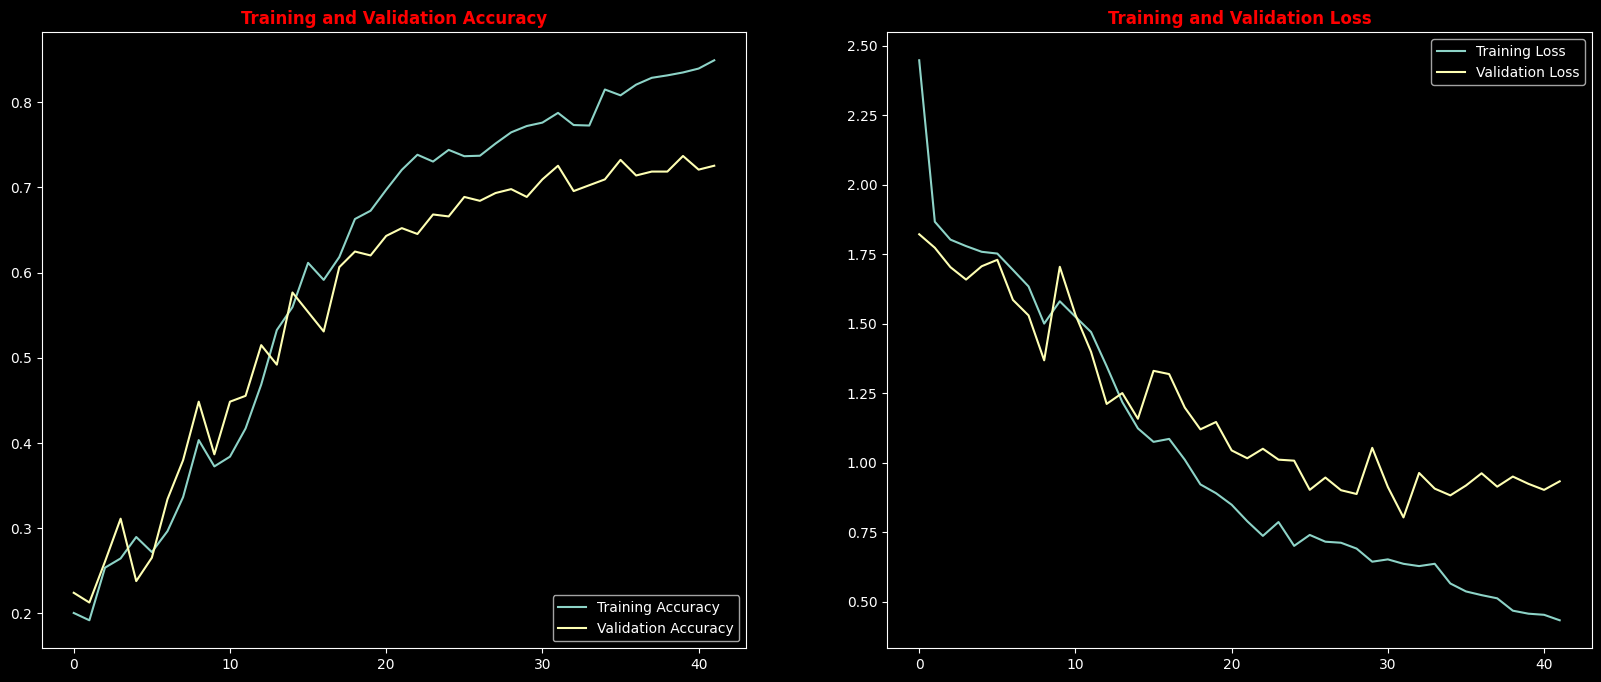

In [46]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(42)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc2, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy',weight='bold',color='red')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label = 'Training Loss')
plt.plot(epochs_range, val_loss2, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss',weight='bold',color='red')
plt.show()

In [48]:
acc2 = history2.history['accuracy']
acc2

[0.2005714327096939,
 0.19200000166893005,
 0.25371429324150085,
 0.2645714282989502,
 0.2897142767906189,
 0.2720000147819519,
 0.29657143354415894,
 0.33657142519950867,
 0.4034285843372345,
 0.3725714385509491,
 0.3840000033378601,
 0.4171428680419922,
 0.46857142448425293,
 0.5325714349746704,
 0.5594285726547241,
 0.6114285588264465,
 0.5914285778999329,
 0.6182857155799866,
 0.6628571152687073,
 0.6725714206695557,
 0.6971428394317627,
 0.7205714583396912,
 0.7382857203483582,
 0.7302857041358948,
 0.7440000176429749,
 0.7365714311599731,
 0.7371428608894348,
 0.7514285445213318,
 0.7645714282989502,
 0.7720000147819519,
 0.7760000228881836,
 0.7874285578727722,
 0.7731428742408752,
 0.7725714445114136,
 0.8148571252822876,
 0.8080000281333923,
 0.8205714225769043,
 0.8285714387893677,
 0.831428587436676,
 0.834857165813446,
 0.8394285440444946,
 0.849142849445343]

In [52]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = 1,
    seed = 123)

test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

Found 564 files belonging to 7 classes.


In [53]:
# Generate predictions
model2.load_weights('/content/vgg16_best_weights_fine_tuning.hdf5') # initialize the best trained weights
preds = model2.predict(test_ds)
pred_classes = np.argmax(preds, axis = 1)

564/564 [==============================] - 5s 9ms/step


In [54]:
model2.evaluate(test_ds, verbose = 1)

564/564 [==============================] - 6s 11ms/step - loss: 0.8492 - accuracy: 0.7234


[0.8491724729537964, 0.7234042286872864]

# **Conclusion**
Accuracy In Pre-Train Model=72%

Accuracy Using Fine-Tuning Model=72%

# **Thank You!**